In [50]:
%autosave 5

Autosaving every 5 seconds


## Imports

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('precision',6)
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,12)

pd.options.mode.chained_assignment = None

## Read-In Data

In [52]:
df = pd.read_csv(r'C:\Users\kofil\OneDrive\Coding\data\Data Breaches\breach.csv')

## Data Manipulation

In [53]:
# Rename Columns
df = df.rename(columns={'Organization type':'OrgType'})

In [54]:
# Capitalize entries in all columns
df['Entity'] = df['Entity'].str.title()
df['Method'] = df['Method'].str.title()
df['OrgType'] = df['OrgType'].str.title()

## Data Inspection

In [55]:
df.head()

,Entity,Year,Records,OrgType,Method
0,21St Century Oncology,2016,2200000,Healthcare,Hacked
1,500Px,2020,14870304,Social Mediaing,Hacked
2,Accendo Insurance Co.,2020,175350,Healthcare,Poor Security
3,Adobe Systems Incorporated,2013,152000000,Tech,Hacked
4,Adobe Inc.,2019,7500000,Tech,Poor Security


In [56]:
df.dtypes

Entity     object
Year       object
Records     int64
OrgType    object
Method     object
dtype: object

In [57]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# No nulls - No Need to fill in missing data

Entity - 0.0%
Year - 0.0%
Records - 0.0%
OrgType - 0.0%
Method - 0.0%


In [58]:
# Check for Duplicates
boolean_mask = df.duplicated(subset=['Entity'], keep=False)

# Only show rows with duplicates
dup_rows = df[boolean_mask]

# Count duplicates
dups_count = boolean_mask.sum()

# Calculate percentage of duplicate values in column
dups_pct = boolean_mask.mean()

In [59]:
# Replace 'Webs' with 'Web', etc. ---> I edited the original dataset

# df['OrgType'] = df['OrgType'].replace({'Webs': 'Web'})

# Verify df['OrgType']

In [60]:
# Duplicates = Keep Duplicates

print(dup_rows)

                                 Entity  Year     Records             OrgType  \
10                        Td Ameritrade  2005      200000           Financial   
15                                  Aol  2021    92000000                 Web   
16                                  Aol  2021    20000000                 Web   
17                                  Aol  2014     2400000                 Web   
22                                 At&T  2008      113000  Telecommunications   
23                                 At&T  2010      114000  Telecommunications   
30                          Bell Canada  2017     1900000  Telecommunications   
31                          Bell Canada  2018      100000  Telecommunications   
53                            Citigroup  2005     3900000           Financial   
54                            Citigroup  2011      360083           Financial   
55                            Citigroup  2013      150000           Financial   
61           Countrywide Fin

## EDA

In [61]:
df.head(20)

,Entity,Year,Records,OrgType,Method
0,21St Century Oncology,2016,2200000,Healthcare,Hacked
1,500Px,2020,14870304,Social Mediaing,Hacked
2,Accendo Insurance Co.,2020,175350,Healthcare,Poor Security
3,Adobe Systems Incorporated,2013,152000000,Tech,Hacked
4,Adobe Inc.,2019,7500000,Tech,Poor Security
5,Advocate Medical Group,2017,4000000,Healthcare,Lost / Stolen Media
6,Aerserv (Subsidiary Of Inmobi),2018,75000,Advertising,Hacked
7,"Affinity Health Plan, Inc.",2013,344579,Healthcare,Lost / Stolen Media
8,Airtel,2019,320000000,Telecommunication,Poor Security
9,Air Canada,2018,20000,Transport,Hacked


In [62]:
# Breaches Per Year
df['Year'].value_counts()

2011             33
2013             26
2019             26
2020             24
2012             22
2018             21
2010             19
2014             18
2015             18
2016             17
2008             16
2009             13
2007             12
2021              9
2006              6
2005              6
2017              6
2018-2019         1
2004              1
2014 and 2015     1
Name: Year, dtype: int64

In [63]:
# Records per Breach: 44,688,632 Records
RecordsPerBreach = round((np.sum([df['Records']]))/(295),0)
print(RecordsPerBreach)

44688632.0


In [64]:
# 10-Largest Breaches

df.nlargest(10,'Records')

,Entity,Year,Records,OrgType,Method
283,Yahoo,2013,3000000000,Web,Hacked
98,First American Corporation,2019,885000000,Financial,Poor Security
92,Facebook,2019,540000000,Social Media,Poor Security
145,Marriott International,2018,500000000,Hotel,Hacked
284,Yahoo,2014,500000000,Web,Hacked
100,Friend Finder Networks,2016,412214295,Web,Poor Security / Hacked
87,Exactis,2018,340000000,Data Broker,Poor Security
8,Airtel,2019,320000000,Telecommunication,Poor Security
239,Truecaller,2019,299055000,Telephone Directory,Unknown
159,Mongodb,2019,275000000,Tech,Poor Security


In [65]:
# 10-Smallest Breaches

df.nsmallest(10,'Records')

,Entity,Year,Records,OrgType,Method
125,Inuvik Hospital,2016,6700,Healthcare,Inside Job
225,Taxslayer.Com,2016,8800,Web,Hacked
156,Ministry Of Health (Singapore),2019,14200,Healthcare,Poor Security/Inside Job
209,South Africa Police,2013,16000,Government,Hacked
9,Air Canada,2018,20000,Transport,Hacked
111,Grozio Chirurgija,2017,25000,Healthcare,Hacked
68,Us Department Of Homeland Security,2016,30000,Government,Poor Security
178,Now:Pensions,2020,30000,Financial,Rogue Contractor
162,Morgan Stanley Smith Barney,2011,34000,Financial,Lost / Stolen Media
64,Cox Communications,2016,40000,Telecommunications,Hacked


In [66]:
# Web Breaches Breakdown

df[df['OrgType'] == 'Web']

,Entity,Year,Records,OrgType,Method
11,Ancestry.Com,2021,300000,Web,Poor Security
15,Aol,2021,92000000,Web,"Inside Job, Hacked"
16,Aol,2021,20000000,Web,Accidentally Published
17,Aol,2014,2400000,Web,Hacked
21,Ashley Madison,2015,32000000,Web,Hacked
24,Auction.Co.Kr,2008,18000000,Web,Hacked
33,Betfair,2010,2300000,Web,Hacked
41,Canva,2019,140000000,Web,Hacked
51,China Software Developer Network,2011,6000000,Web,Hacked
52,"Chinese Gaming Websites (Three: Duowan, 7K7K, ...",2011,10000000,Web,Hacked


In [67]:
# Social Media Breaches Breakdown

df[df['OrgType'] == 'Social Media']

,Entity,Year,Records,OrgType,Method
90,Facebook,2013,6000000,Social Media,Accidentally Published
91,Facebook,2018,50000000,Social Media,Poor Security
92,Facebook,2019,540000000,Social Media,Poor Security
93,Facebook,2019,1500000,Social Media,Accidentally Uploaded
94,Facebook,2019,267000000,Social Media,Poor Security
109,Google Plus,2018,500000,Social Media,Poor Security
123,Instagram,2020,200000000,Social Media,Poor Security
233,Tiktok,2020,42000000,Social Media,Poor Security
288,Youtube,2020,4000000,Social Media,Poor Security
290,Zynga,2019,173000000,Social Media,Hacked


In [68]:
# Facebook Breakdown

df[df['Entity']=='Facebook']

,Entity,Year,Records,OrgType,Method
90,Facebook,2013,6000000,Social Media,Accidentally Published
91,Facebook,2018,50000000,Social Media,Poor Security
92,Facebook,2019,540000000,Social Media,Poor Security
93,Facebook,2019,1500000,Social Media,Accidentally Uploaded
94,Facebook,2019,267000000,Social Media,Poor Security


In [69]:
# Breaches by Entity

df['Entity'].value_counts()

Facebook                      5
Aol                           3
Citigroup                     3
Uber                          2
Jp Morgan Chase               2
                             ..
Animal Jam                    1
Adobe Systems Incorporated    1
Myheritage                    1
Rbs Worldpay                  1
Accendo Insurance Co.         1
Name: Entity, Length: 277, dtype: int64

In [70]:
# 2011 Had the most breaches, lets look at the breakdown by OrgType

df[df['Year'] == '2011']['OrgType'].value_counts()

Healthcare    8
Web           7
Gaming        4
Government    4
Financial     3
Military      3
Retail        2
Academic      1
Media         1
Name: OrgType, dtype: int64

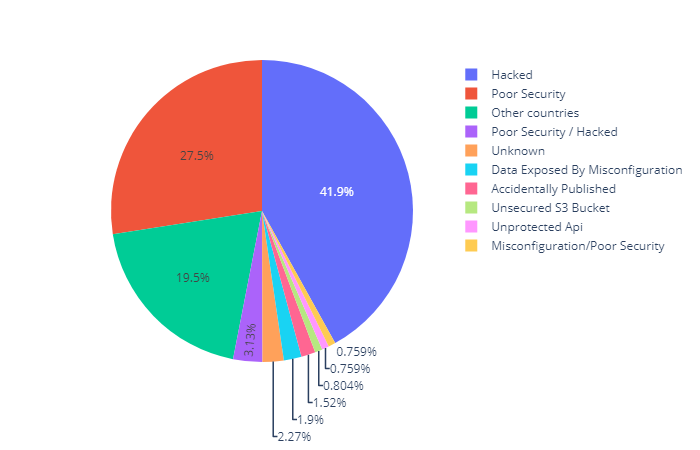

In [71]:
df.loc[df['Records'] < 1.e8, 'Method'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values="Records", names="Method", width=800, height=800)
fig.show(renderer="png")

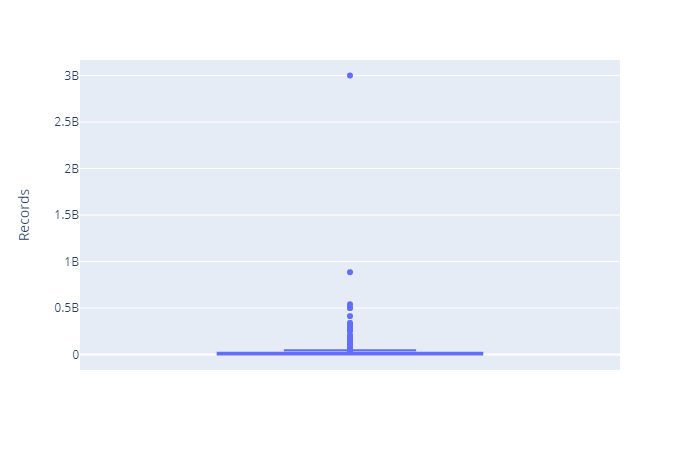

In [72]:
# Records Distributions and Outliers
fig = px.box(df, y="Records")
fig.show(renderer="png")

# Large Number of outliers based on the BoxPlot, but 1 EXTREME outlier. --> Not really relevant in this analysis

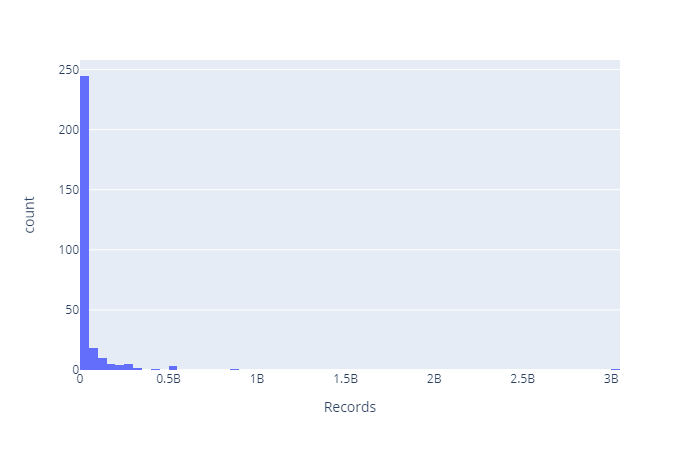

In [73]:
# Records Histogram
fig = px.histogram(df, x='Records')
fig.show(renderer="png")

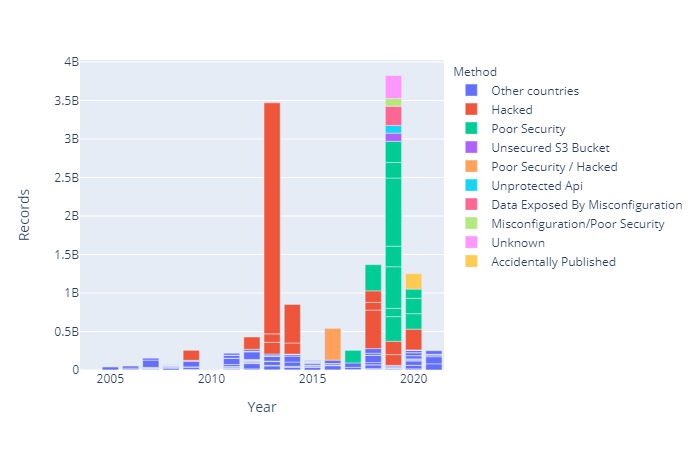

In [74]:
# Records over time, by method
fig = px.bar(df, x="Year", y="Records", color="Method")
fig.show(renderer="png")

# 2019 had the most Compromised Files = ~3.75B

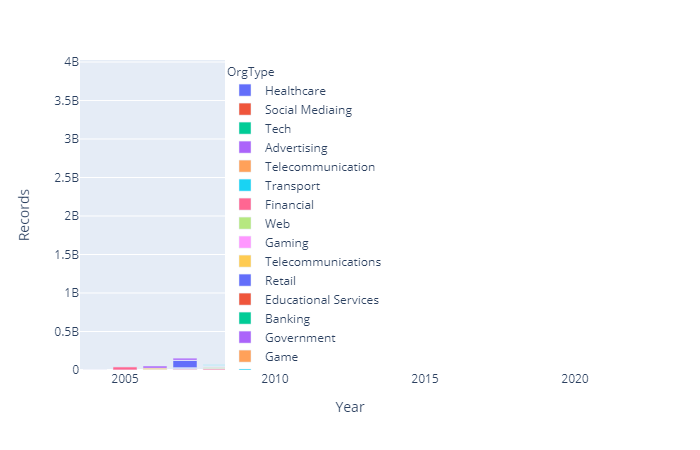

In [75]:
fig = px.bar(df, x="Year", y="Records", color='OrgType', height=800, width=1200)
fig.show(renderer="png")